In [1]:
# pip install waitress

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install jupyter-dash

In [3]:
print(dash.__version__)

2.5.1


In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import flask
import dash
from flask import Flask

In [8]:
hd = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [21]:
hd.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [0]:
#Reveals the first person's statistics

In [22]:
hd[hd.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
hd.drop('id',inplace=True,axis=1)
hd.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
hd.dropna(inplace=True)
hd.reset_index(drop=True, inplace=False)
hd.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5104,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [9]:
hd.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5090,4211,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5091,6369,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5092,56799,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5093,32235,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [0]:
#checks for null values

In [26]:
hd.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [0]:
#Reveals the first two non-null values of from the dataset

In [29]:
hd.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [22]:
hd.drop([466, 544, 928, 1559, 2128, 2764, 2840, 3825, 4188, 4209, 4838, 270, 358])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,15,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,6,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,15,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,6,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,6,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,6,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,6,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,6,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,6,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:

bmiAgeSexStrokePlot = px.scatter(hd,y=hd["stroke"],x=hd["age"], facet_col="gender",color="ever_married",labels=dict(stroke="Number of Strokes",age="Age",gender="Sex", ever_married="If Married", heart_disease="If Heart Disease Present"),symbol="heart_disease",opacity=1,height=500,width=1400)
bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
bmiAgeSexStrokePlot.update_layout(margin=dict(l=0, r=0, b=0, t=0))


In [0]:
#Multiple plots depicting the age and sex and their relation to strokes.

In [27]:
hd["heart_disease"]=hd["heart_disease"].replace([1],15)
hd["heart_disease"]=hd["heart_disease"].replace([0],6)
bmiAgeSexStrokePlot = px.scatter_3d(hd,y=hd["avg_glucose_level"],x=hd["age"], z=hd["bmi"], symbol="ever_married",labels=dict(stroke="Number of Strokes",age="Age",gender="Sex", bmi="BMI", heart_disease="If Heart Disease Present", avg_glucose_level="Average Glucose Level",smoking_status="If Smoke"),color="stroke",opacity=0.8,size="heart_disease",size_max=20)
bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
#bmiAgeSexStrokePlot.update_traces(marker_size = 2.5)
bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
bmiAgeSexStrokePlot.update_layout(margin=dict(l=40, r=40, b=40, t=40))

/tmp/ipykernel_1058/363970487.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1058/363970487.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
#Multidimensional plot that depicts most of the variables with the stats of the given person including marriage status.
#Younger people typically have a lower glucose level
#Higher glucose level, higher chance to get a stroke
#Older, higher chance
#Higher BMI, higher chance
#Females typically have a lower glucose level

In [91]:
hd["heart_disease"]=hd["heart_disease"].replace([1],12)
hd["heart_disease"]=hd["heart_disease"].replace([0],6)
bmiAgeSexStrokePlot = px.scatter_3d(hd,y=hd["avg_glucose_level"],x=hd["age"], z=hd["bmi"], symbol="stroke",labels=dict(stroke="Number of Strokes",age="Age",gender="Sex", bmi="BMI", heart_disease="If Heart Disease Present"),color="gender",opacity=0.8,size="heart_disease",size_max=12,avg_glucose_level="Average Glucose Level")
bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
#bmiAgeSexStrokePlot.update_traces(marker_size = 2.5)
bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
bmiAgeSexStrokePlot.update_layout(margin=dict(l=40, r=40, b=40, t=40))

In [0]:
#Multidimensional plot that depicts most of the variables with the stats of the given person. 

In [54]:
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Stroke Data Based on BMI, Age, Sex'),
    dcc.Graph(id="graph"),
    html.P("Age:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=100, step=1,
        marks={0: '0 Yo.', 100: '100 Yo.'},
        value=[0.5, 2]
    ),
])

@app.callback(
    Output("graph", "figure"),
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (hd.age> low) & (hd.age < high)

    bmiAgeSexStrokePlot = bmiAgeSexStrokePlot=px.scatter_3d(hd[mask],y=hd["stroke"],x=hd["age"], z=hd["bmi"], color="gender",labels=dict(stroke="Number of         Strokes",age="Age",gender="Sex", bmi="BMI", heart_disease="If Heart Disease Present"),symbol="heart_disease",opacity=0.5)
    bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
    bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
    bmiAgeSexStrokePlot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return bmiAgeSexStrokePlot
if __name__ == '__main__':
   app.run_server(debug=False)
server = app.server
from waitress import serve
from app import server
serve(server)

Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__' (lazy loading)


 * Environment: production


   Use a production WSGI server instead.


 * Debug mode: off


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 

<AxesSubplot:>

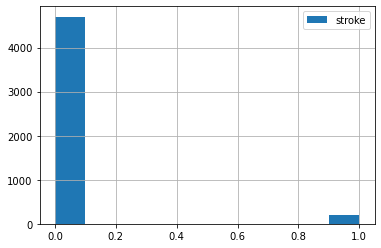

In [44]:
hd['stroke'].hist(by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, figsize=None, bins=10, backend=None, legend=True)

In [0]:
#Little Histogram that shows the data imbalance.

In [0]:
#Scatter matrix that depicts the stats of all different variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

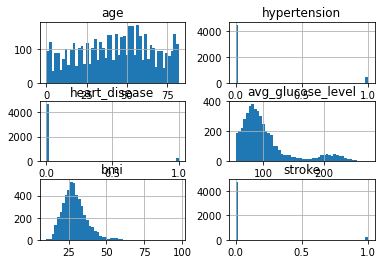

In [33]:
hd.hist(bins=50)

In [25]:
figScatter=px.scatter_matrix(hd)
figScatter.update_layout(autosize=False,width=1000,height=1000)
figScatter.show()

In [0]:
#Multiple histograms to see an overview of all of the stats. 

In [59]:
hd.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [24]:
from dash import Dash

In [5]:
from dash import Dash, dcc, html, Input, Output

ap = Dash(__name__)


ap.layout = html.Div([
    html.H4('Analysis of Strokes'),
    dcc.Graph(id="graph"),
    html.P("Names:"),
    dcc.Dropdown(id='names',
        options=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
        value='gender', clearable=False
    )
    html.P("Values:"),
    dcc.Dropdown(id='values',
        options=['male', 'female'],
        value='gender', clearable=False
    ),
])


@ap.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = px.data.hd() # replace with your own data source
    fig = px.pie(df, values=values, names=names, hole=.3)
    return fig

from waitress import serve
serve(ap, host="0.0.0.0", port=8080)